# DAY 1 GFG ML
- I am going to do EDA on the Titanic dataset
<br>

# End-to-End Exploratory Data Analysis (EDA) on the Titanic Dataset

**Project Objective:** To perform a comprehensive, step-by-step exploratory data analysis to understand the key factors that influenced survival on the Titanic.

### Step 1: Setup - Importing Libraries

In [183]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style('darkgrid')


In [184]:
## getting data
!git clone 'https://github.com/HarshvardhanSingh-13/Datasets'

fatal: destination path 'Datasets' already exists and is not an empty directory.


In [185]:
## pushing the data of the csv to the pandas df
df = pd.read_csv('/content/Datasets/Titanic_Dataset/Titanic-Dataset.csv')

In [186]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [187]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [188]:
## for getting the counts of a probable feature
df["Survived"].value_counts()

,count
Survived,
0,549
1,342


In [189]:
## to see the size of the df
df.size

10692

In [190]:
## info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [191]:
## describe
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


we can see that the difference between the mean and the max value is more in fare than the age

In [192]:
df['Ticket'].value_counts()

,count
Ticket,
347082,7
1601,7
CA. 2343,7
3101295,6
CA 2144,6
...,...
PC 17590,1
17463,1
330877,1


### Step 3: Data Cleaning

Before analysis, we must handle the missing values we identified.

In [193]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


from this we can refer how to fill the missing values or to do suitable feature engineering

In [194]:
df["Fare"].mean(),df["Fare"].median(), \
df["Age"].mean(),df["Age"].median()

(np.float64(32.204207968574636), 14.4542, np.float64(29.69911764705882), 28.0)

contrasting the shifted dataset of the fare with the age which reflets with the mean and mode of them. so mode is a better choice for skewed dataset.

In [195]:
median=df['Age'].median()
df['Age'].fillna(median),df['Age']
df['Age']=df['Age'].fillna(median)

In [196]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


we now have the embarked and the cabin remaining to fill

In [197]:
df["Embarked"].mode(),type(df["Embarked"].mode())

(0    S
 Name: Embarked, dtype: object,
 pandas.core.series.Series)

In [198]:
## to get the string from this dataframe element
df["Embarked"].mode()[0]

'S'

In [199]:
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

/tmp/ipython-input-548196730.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)


In [200]:
df.isnull().sum() ## hence all values are filled

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [201]:
## lets create a new column of boolean values and drop the Cabin coloumn
df['Cabin'].notna(),df["Cabin"].isnull()

(0      False
 1       True
 2      False
 3       True
 4      False
        ...  
 886    False
 887     True
 888    False
 889     True
 890    False
 Name: Cabin, Length: 891, dtype: bool,
 0       True
 1      False
 2       True
 3      False
 4       True
        ...  
 886     True
 887    False
 888     True
 889    False
 890     True
 Name: Cabin, Length: 891, dtype: bool)

In [202]:
## if they are the complement then
df['Cabin'].notna()+df["Cabin"].isnull(), \
(df['Cabin'].notna()+df["Cabin"].isnull()).sum()

(0      True
 1      True
 2      True
 3      True
 4      True
        ... 
 886    True
 887    True
 888    True
 889    True
 890    True
 Name: Cabin, Length: 891, dtype: bool,
 np.int64(891))

In [203]:
## new column
df['Has_Cabin'] = df['Cabin'].notna().astype(int)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Has_Cabin    891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [205]:
df.drop('Cabin',axis=1,inplace=True)

In [206]:
## for the row elements if we have to drop any axis=0 for it
df.head(),df.drop(0,axis=0)

(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Embarked  Has_Cabin  
 0      0         A/5 21171   7.2500        S          0  
 1      0          PC 17599  71.2833        C          1  
 2      0  STON/O2. 3101282   7.9250        S          0  
 3      0            113803  53.1000        S          1  
 4      0  

### Step 4: Univariate Analysis

We analyze each variable individually to understand its distribution.

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Has_Cabin    891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


Analyzing categorical features:


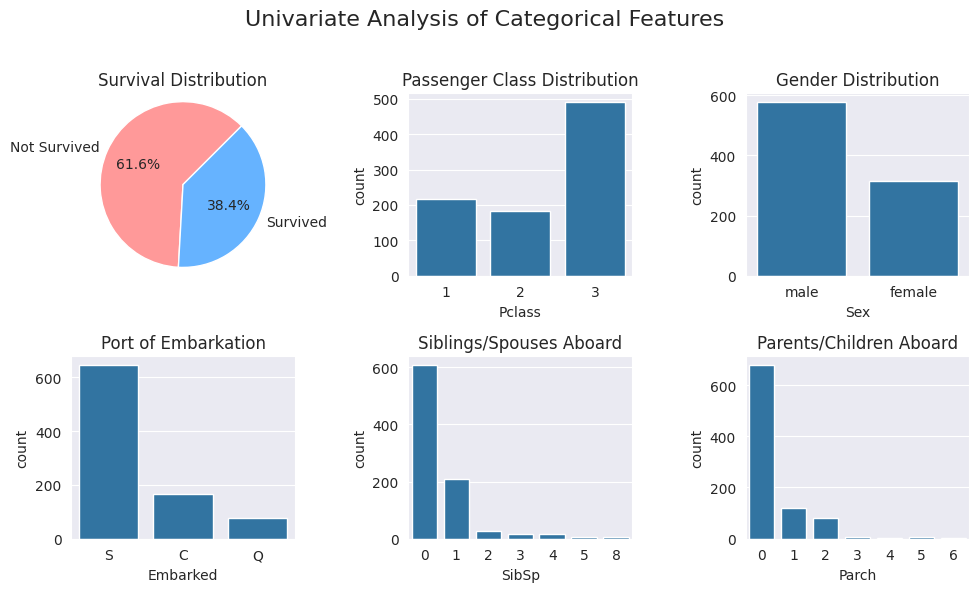

In [208]:
print("Analyzing categorical features:")

# Set up the figure for plotting
fig, axes = plt.subplots(2, 3, figsize=(10, 6))
fig.suptitle('Univariate Analysis of Categorical Features', fontsize=16)

# Plotting each categorical feature
survived_counts = df['Survived'].value_counts()
axes[0, 0].pie(survived_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=45, colors=['#ff9999','#66b3ff'])
axes[0, 0].set_title('Survival Distribution')
axes[0, 0].axis('equal')

sns.countplot(ax=axes[0, 1], x='Pclass', data=df).set_title('Passenger Class Distribution')
sns.countplot(ax=axes[0, 2], x='Sex', data=df).set_title('Gender Distribution')
sns.countplot(ax=axes[1, 0], x='Embarked', data=df).set_title('Port of Embarkation')
sns.countplot(ax=axes[1, 1], x='SibSp', data=df).set_title('Siblings/Spouses Aboard')
sns.countplot(ax=axes[1, 2], x='Parch', data=df).set_title('Parents/Children Aboard')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

here i have added a pie chart for reference in the survival distribution

things which i notice are:
* **survival :** more people have not survived.
* **passenger class distribution :** third class passengers are present more
* **Gender distribution :** more number of male passengers were present
* **Sib/spouse aboard :** most passenger had no or very little sib/spouse same as parents / children.
* **Embarked :** mostly peoplr have embarked from 'S' port.



Analyzing numerical features:


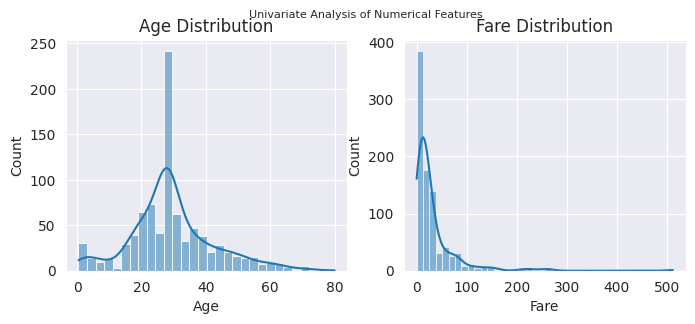

In [209]:

print("\nAnalyzing numerical features:")

fig, axes = plt.subplots(1, 2, figsize=(8, 3))
fig.suptitle('Univariate Analysis of Numerical Features', fontsize=8)

# Plotting Age distribution
sns.histplot(ax=axes[0], data=df, x='Age', kde=True, bins=30).set_title('Age Distribution')

# Plotting Fare distribution
sns.histplot(ax=axes[1], data=df, x='Fare', kde=True, bins=40).set_title('Fare Distribution')

plt.show()

things i notice are:
* **Age-dist :** more people are prensent in the range 20 to 40
* **Fare Distribution :** most tickets were cheap few outliers maybe from the rich people onboard


### Step 5: Bivariate Analysis

Here, we explore the relationship between two variables. Our primary focus will be on how each feature relates to our target variable, `Survived`.

Bivariate Analysis: Feature vs. Survival


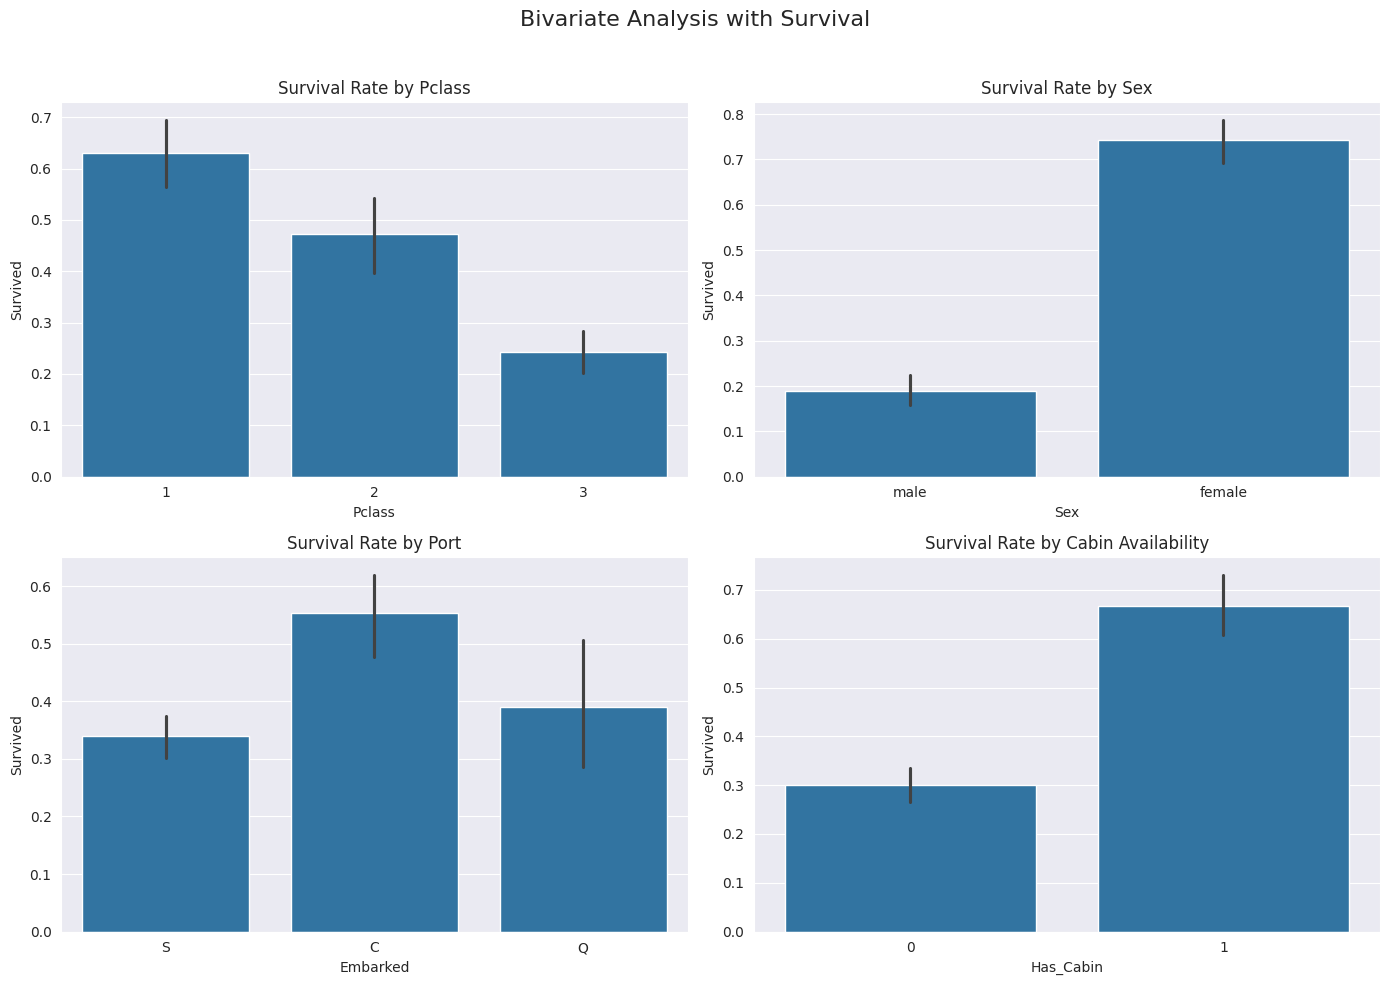

In [210]:
print("Bivariate Analysis: Feature vs. Survival")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Bivariate Analysis with Survival', fontsize=16)

# Pclass vs. Survived
sns.barplot(ax=axes[0, 0], x='Pclass', y='Survived', data=df).set_title('Survival Rate by Pclass')

# Sex vs. Survived
sns.barplot(ax=axes[0, 1], x='Sex', y='Survived', data=df).set_title('Survival Rate by Sex')

# Embarked vs. Survived
sns.barplot(ax=axes[1, 0], x='Embarked', y='Survived', data=df).set_title('Survival Rate by Port')

# Has_Cabin vs. Survived
sns.barplot(ax=axes[1, 1], x='Has_Cabin', y='Survived', data=df).set_title('Survival Rate by Cabin Availability')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

things i notice:
* **Pclass :** here the first class passengers had the highest survival rate and third class is lowest below 25%
* **Sex :** females had higher survival rate 75% approx and males 25% approx
* **Embarked :** passengers from port C had highest chance of survival.
* **Has_Cabin :** passengers who had cabins had higher chance of survival likewise the first class.


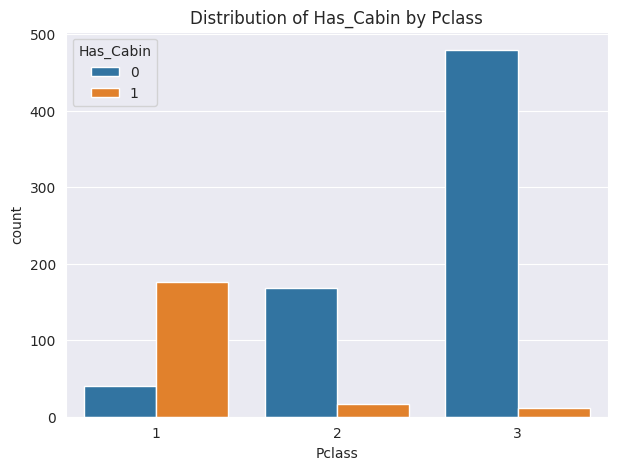

In [211]:
## Pclass and has_cabin vs count
plt.figure(figsize=(7, 5))
sns.countplot(x='Pclass', hue='Has_Cabin', data=df)
plt.title('Distribution of Has_Cabin by Pclass')
plt.show()

here we can see that the passengers with first class has higher number of cabin holders which is a factor for survival rate

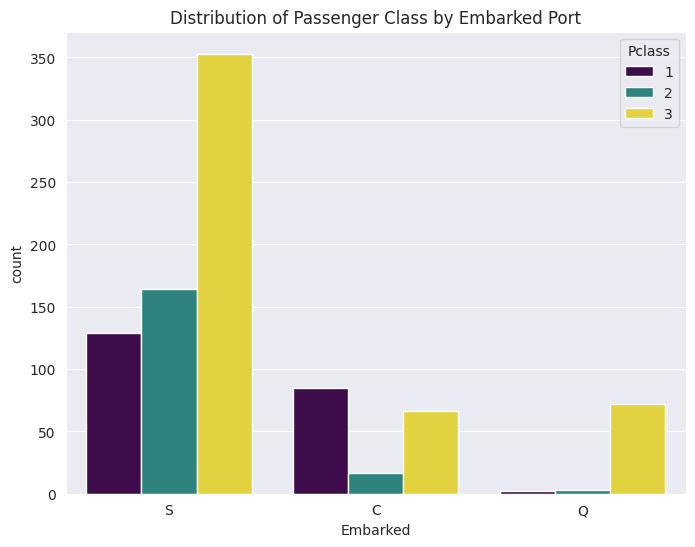

In [212]:
## port of emarkation and Pclass vs number of passengers
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', hue='Pclass', data=df, palette='viridis')
plt.title('Distribution of Passenger Class by Embarked Port')
plt.legend(title='Pclass')
plt.show()

here in most first class passengers in first class are from S and C and in C the no of first class passengers are higher than other class. this may imply the higher survival rate of the port C

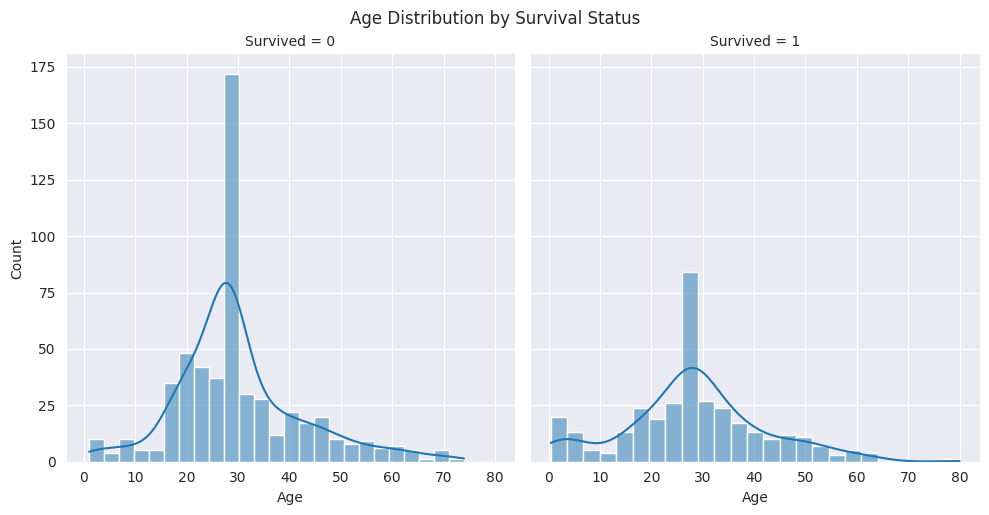

In [213]:
## Age vs Survival
g = sns.FacetGrid(df,col='Survived',height=5)
g.map(sns.histplot,'Age',bins=25,kde=True)
plt.suptitle('Age Distribution by Survival Status', y=1.02)
plt.show()

things i norice:
* infants and kids had high survival rate
* adults aged 20 to 40 had low survival rate
* old people didnt survive

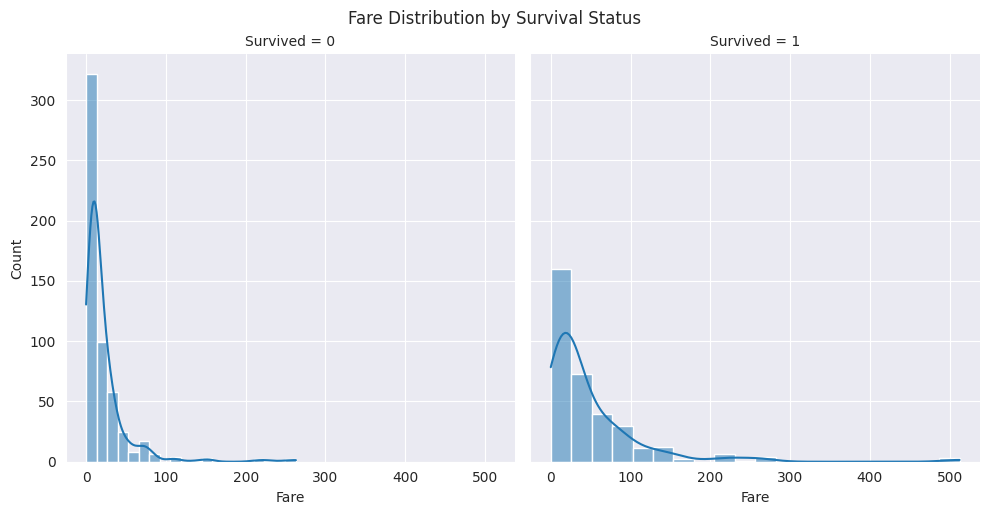

In [214]:
## Fare vs Survival
g = sns.FacetGrid(df,col='Survived',height=5)
g.map(sns.histplot,'Fare',bins=20,kde=True)
plt.suptitle('Fare Distribution by Survival Status', y=1.02)
plt.show()

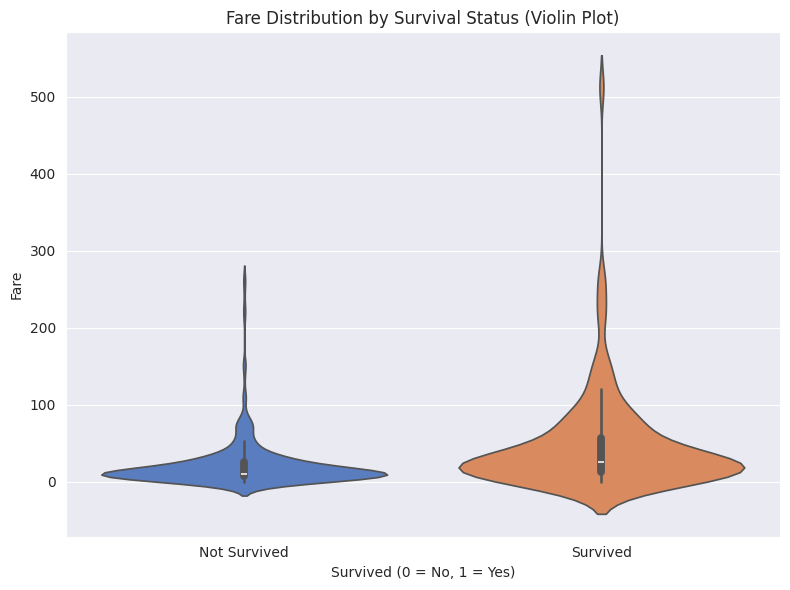

In [215]:
## violin plot of survival status vs fare
plt.figure(figsize=(8, 6))
sns.violinplot(x='Survived', y='Fare', data=df, palette='muted', hue='Survived', legend=False)
plt.title('Fare Distribution by Survival Status (Violin Plot)')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.tight_layout()
plt.show()

from the above analysis we get to know that the ratio of survived passengers is more by higher fare

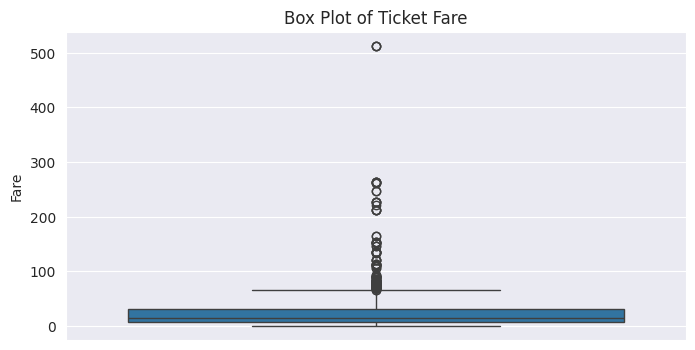

In [216]:
plt.figure(figsize=(8,4))
sns.boxplot(y='Fare',data=df)
plt.title('Box Plot of Ticket Fare')
plt.ylabel('Fare')
plt.show()

here we can observe that there are many outliers for the ticket fare data likely to be the first class passengers who booked luxurious suites

### Step 6: Feature Engineering
Now, we'll create new features from the existing ones to potentially uncover deeper insights and provide more useful information for a machine learning model.

In [217]:
## 1. Create a 'FamilySize' Column
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [218]:
## 2. Create an 'Isalone' Feature

df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1,'IsAlone'] = 1

In [219]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,1


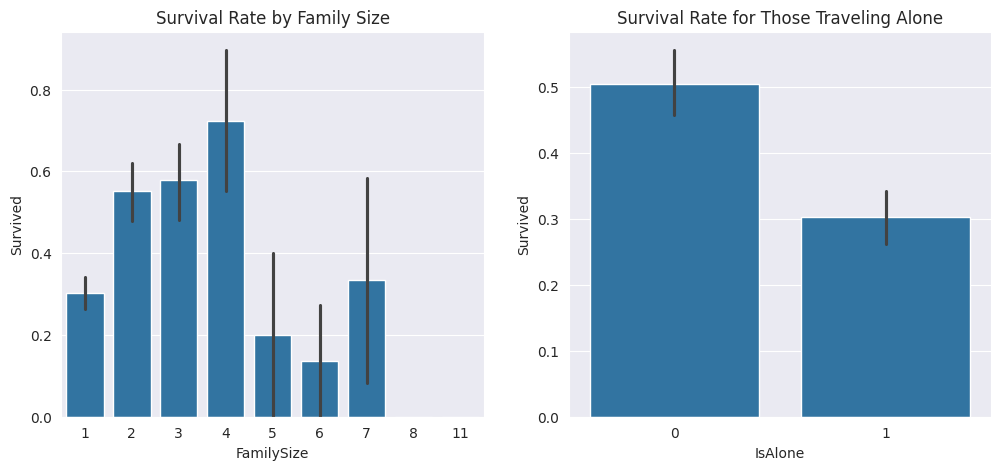

In [220]:
# Analyze the new family-related features against survival
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Survival Rate by FamilySize
sns.barplot(ax=axes[0], x='FamilySize', y='Survived', data=df).set_title('Survival Rate by Family Size')

# Survival Rate by IsAlone
sns.barplot(ax=axes[1], x='IsAlone', y='Survived', data=df).set_title('Survival Rate for Those Traveling Alone')

plt.show()

here we can observe that the small families had higher survival rate whereas big families and lone passengers had lower survival rate.

In [221]:
df['Name']

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [222]:
# 3. Extract 'Title' from the 'Name' column
df['Title'] = df['Name'].str.extract(r' ([a-zA-Z]+)\.', expand=False)

In [223]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S,0,1,1,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S,1,1,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.45,S,0,4,0,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C,1,1,1,Mr
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q,0,1,1,Mr


In [224]:
df['Title'].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


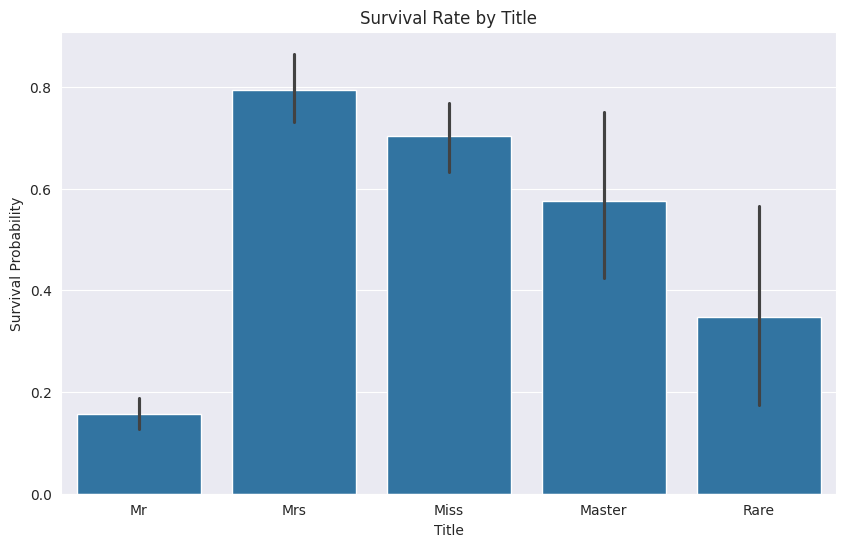

In [225]:
# Simplify the titles by grouping rare ones into a 'Rare' category
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Let's see the survival rate by the new, cleaned titles
plt.figure(figsize=(10, 6))
sns.barplot(x='Title', y='Survived', data=df)
plt.title('Survival Rate by Title')
plt.ylabel('Survival Probability')
plt.show()

this implies that the females had higher survival rate and master meant young boys (children) , rare titles which can contain title related to status had high survival rate than men

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Has_Cabin    891 non-null    int64  
 12  FamilySize   891 non-null    int64  
 13  IsAlone      891 non-null    int64  
 14  Title        891 non-null    object 
dtypes: float64(2), int64(8), object(5)
memory usage: 104.5+ KB


In [227]:
df['Ticket']

,Ticket
0,A/5 21171
1,PC 17599
2,STON/O2. 3101282
3,113803
4,373450
...,...
886,211536
887,112053
888,W./C. 6607
889,111369


In [228]:
df['ticket_type'] = df['Ticket'].str.extract(r'([A-Za-z\./]+)', expand=False)
df['ticket_type'] = df['ticket_type'].fillna('NUMERIC_TICKET')

In [229]:
df['ticket_type']

,ticket_type
0,A/
1,PC
2,STON/O
3,NUMERIC_TICKET
4,NUMERIC_TICKET
...,...
886,NUMERIC_TICKET
887,NUMERIC_TICKET
888,W./C.
889,NUMERIC_TICKET


In [230]:
print("Original ticket type counts:")
print(df['ticket_type'].value_counts())

rare_ticket_types = df['ticket_type'].value_counts()[df['ticket_type'].value_counts() < 4].index
df['ticket_type'] = df['ticket_type'].replace(rare_ticket_types, 'Rare')

print("\nTicket type counts after grouping rare types:")
print(df['ticket_type'].value_counts())

Original ticket type counts:
ticket_type
NUMERIC_TICKET    661
PC                 60
C.A.               27
A/                 23
STON/O             18
W./C.               9
SOTON/O.Q.          8
CA.                 8
SOTON/OQ            7
CA                  6
C                   5
SC/PARIS            5
F.C.C.              5
S.O.C.              5
SC/Paris            4
LINE                4
S.O./P.P.           3
PP                  3
SC/AH               3
A./                 2
A.                  2
WE/P                2
S.C./PARIS          2
SOTON/O             2
P/PP                2
Fa                  1
A                   1
S.O.P.              1
S.P.                1
S.C./A.             1
SO/C                1
W.E.P.              1
SC                  1
SCO/W               1
W/C                 1
SW/PP               1
S.W./PP             1
A/S                 1
F.C.                1
C.A./SOTON          1
Name: count, dtype: int64

Ticket type counts after grouping rare types:
ticket

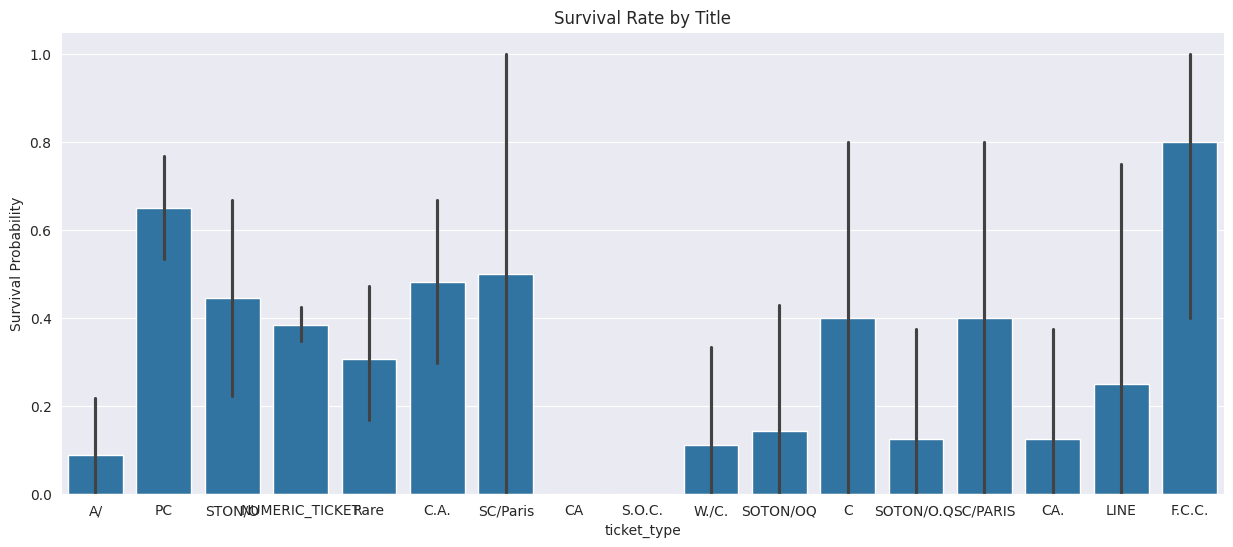

In [231]:
plt.figure(figsize=(15, 6))
sns.barplot(x='ticket_type', y='Survived', data=df)
plt.title('Survival Rate by Title')
plt.ylabel('Survival Probability')
plt.show()

here we can observe that some ticket type have way high survival rates than other types of tickets

### Step 7: Multivariate Analysis

Now we explore interactions between multiple variables simultaneously, including our new engineered features.

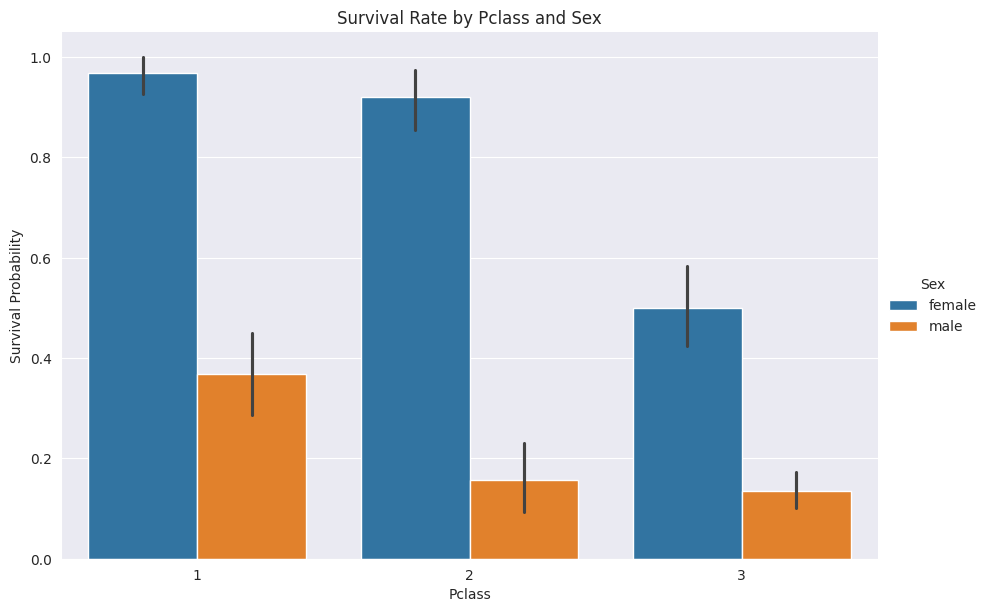

In [232]:
# Survival rate by Pclass and Sex
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df, kind='bar', height=6, aspect=1.5)
plt.title('Survival Rate by Pclass and Sex')
plt.ylabel('Survival Probability')
plt.show()

# Insights: Females in all classes had a significantly higher survival rate than males.

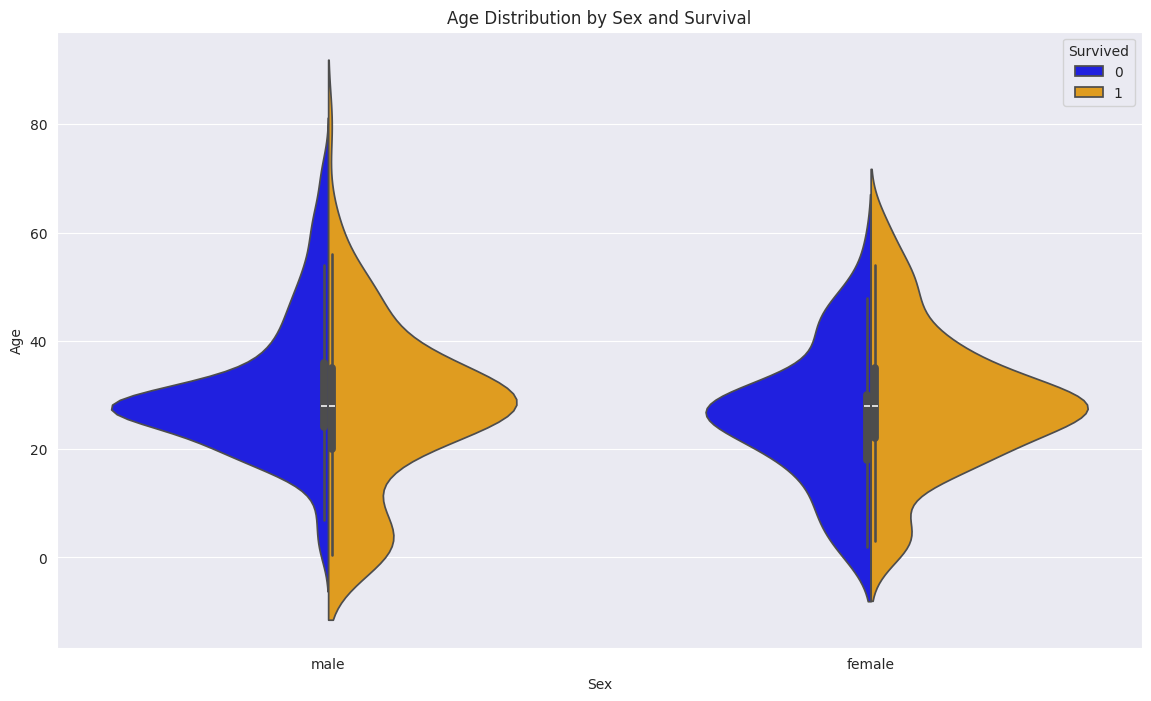

In [233]:
# Violin plot to see age distribution by sex and survival status
plt.figure(figsize=(14, 8))
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True, palette={0: 'blue', 1: 'orange'})
plt.title('Age Distribution by Sex and Survival')
plt.show()

the width of the orange is bigger and hence the survival rate is high throughout, in male the children have high survival rate and a peak on young adults in the blue region

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Has_Cabin    891 non-null    int64  
 12  FamilySize   891 non-null    int64  
 13  IsAlone      891 non-null    int64  
 14  Title        891 non-null    object 
 15  ticket_type  891 non-null    object 
dtypes: float64(2), int64(8), object(6)
memory usage: 111.5+ KB


<Figure size 1500x1500 with 0 Axes>

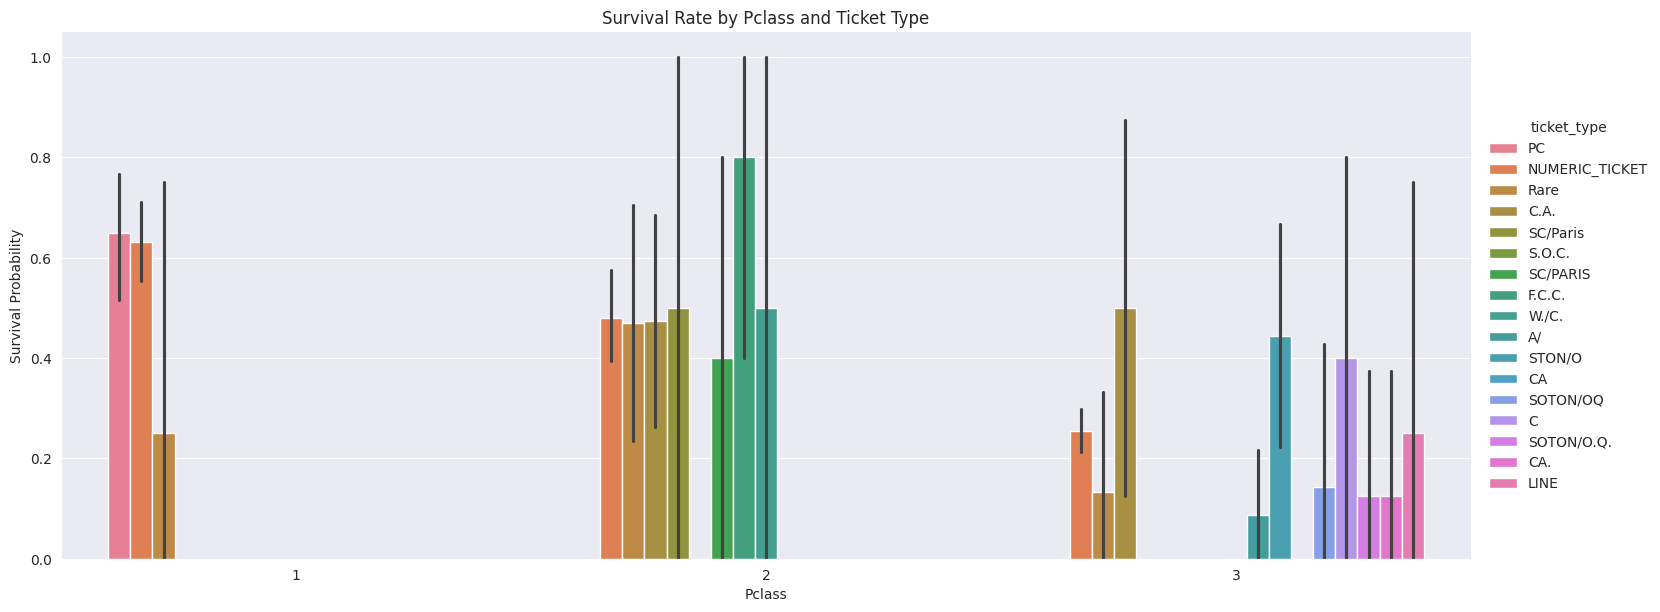

In [235]:
## Pclass and ticket_type vs survival probability
plt.figure(figsize=(15, 15))
sns.catplot(x='Pclass', y='Survived', hue='ticket_type', data=df, kind='bar', height=6, aspect=2.5)
plt.title('Survival Rate by Pclass and Ticket Type')
plt.ylabel('Survival Probability')
plt.show()

here we can see that some types in second class has higher survival rate than first class which can imply important officers with special ticket designations can be present

### Step 8: Correlation Analysis

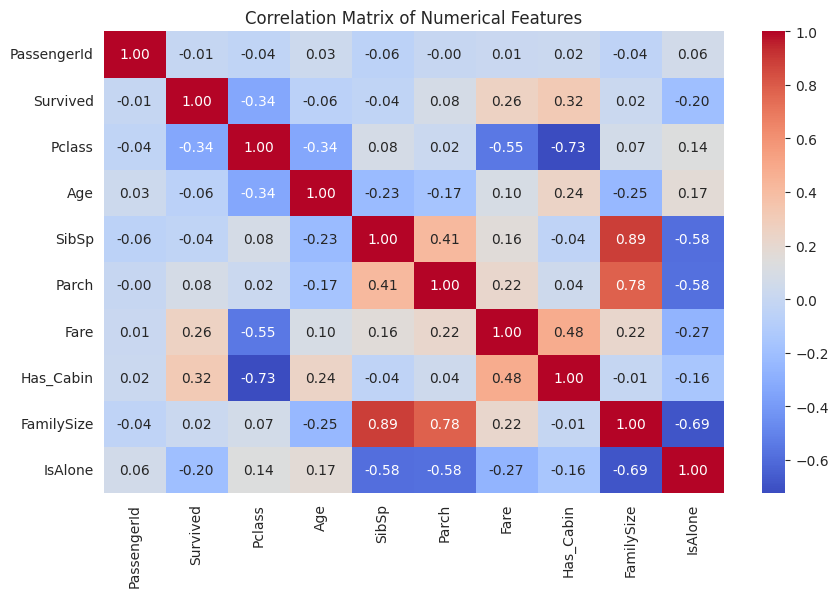

In [236]:
# Correlation Heatmap for numerical features
plt.figure(figsize=(10, 6))
numeric_cols = df.select_dtypes(include=np.number)
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Interpretation of the Heatmap:**
- **`Survived`** has a notable positive correlation with `Fare` and `Has_Cabin`, and a negative correlation with `Pclass` and our new `IsAlone` feature.
- **`Pclass`** and `Fare` are strongly negatively correlated, which makes sense (1st class = high fare).
- Our new **`FamilySize`** feature is composed of `SibSp` and `Parch`, so it's highly correlated with them by definition.

### Step 9: Final Conclusion and Summary of Insights

This end-to-end EDA has provided a deep understanding of the Titanic dataset. Our analysis confirms the "women and children first" narrative and highlights the stark social inequalities of the time. Through feature engineering, we've created even more powerful predictors for a potential machine learning model.

**Key Findings:**
1.  **Strongest Predictors of Survival:**
    - **Title & Sex:** Being female ('Mrs', 'Miss') was the single most significant advantage. Our engineered `Title` feature captures this nuance better than `Sex` alone, also showing that young boys ('Master') had a much higher survival rate than adult men ('Mr').
    - **Passenger Class:** There was a clear survival hierarchy: 1st > 2nd > 3rd class.
    - **Age:** Children and infants had a higher survival rate.

2.  **Other Influential Factors:**
    - **Family Size:** Traveling in a small family (2-4 members) increased survival chances, while traveling alone or in a very large family decreased them.
    - **Fare/Cabin:** Having a cabin (and thus paying a higher fare) was strongly correlated with survival, acting as a proxy for wealth and passenger class.
    - **Port of Embarkation:** Passengers from Cherbourg ('C') had a higher survival rate, possibly because a higher proportion of them were in 1st class.

These insights are fundamental for the next step in the data science pipeline: building a predictive machine learning model to forecast survival.

In [237]:
import pandas as pd
from ydata_profiling import ProfileReport

#df = pd.read_csv('/content/Datasets/Titanic_Dataset/Titanic-Dataset.csv')
profile = ProfileReport(df, title="Profiling Report")
ProfileReport(df, title="My Data Report").to_file("report_final.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 16/16 [00:00<00:00, 40.80it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]